
## Algorithm Random Forest - ансамблевый алгоритм
#### Random Forest - это модель для решения задач регерессии и задач классификации. 

Достаточно гибкая модель, но сложная для интерпретации.
Идея заключается в том, чтобы вырсатить много деревьев вместо одного дерева (мудрость толпы). 

 #### _1) для задач КЛАССИФИКАЦИИ определяется БОЛЬШИНСТВОМ_
 #### _2) для задач РЕГРЕССИИ определяется СРЕДНИМ ЗНАЧЕНИЕМ_

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
df =pd.read_excel('../Random forest/wb_teapot.xlsx', sheet_name='Sheet1')   # данные с портала WildBerries
type(df)

pandas.core.frame.DataFrame

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                642 non-null    int64  
 1   Review                            642 non-null    int64  
 2   Star                              642 non-null    int64  
 3   Value                             642 non-null    int64  
 4   brandId                           642 non-null    int64  
 5   brandName                         642 non-null    object 
 6   goodsName                         642 non-null    object 
 7   isSoldOut                         642 non-null    int64  
 8   link                              642 non-null    object 
 9   lowQuantity                       642 non-null    int64  
 10  ordersCount                       642 non-null    int64  
 11  price                             642 non-null    int64  
 12  qualityR

In [4]:
df.columns

Index(['id', 'Review', 'Star', 'Value', 'brandId', 'brandName', 'goodsName',
       'isSoldOut', 'link', 'lowQuantity', 'ordersCount', 'price',
       'qualityRate', 'Вес с упаковкой (кг)', 'Длина кабеля',
       'Количество температурных режимов', 'Материал корпуса', 'Модель',
       'Мощность устройства', 'Объем чайника', 'Страна бренда',
       'Страна производитель', 'Цвет', 'sale_june'],
      dtype='object')

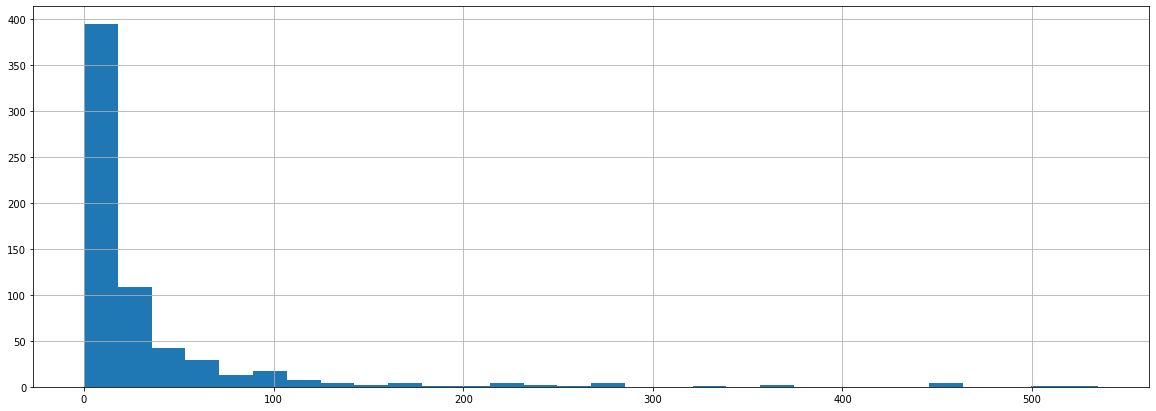

In [5]:
df['Review'].hist(bins=30, figsize=(20,7)); # распределение количества отзывов

In [6]:
df.count()

id                                  642
Review                              642
Star                                642
Value                               642
brandId                             642
brandName                           642
goodsName                           642
isSoldOut                           642
link                                642
lowQuantity                         642
ordersCount                         642
price                               642
qualityRate                         642
Вес с упаковкой (кг)                637
Длина кабеля                        625
Количество температурных режимов    614
Материал корпуса                    336
Модель                              637
Мощность устройства                 634
Объем чайника                       641
Страна бренда                       642
Страна производитель                642
Цвет                                642
sale_june                           642
dtype: int64

In [7]:
df[df['Review']>10].count()

id                                  329
Review                              329
Star                                329
Value                               329
brandId                             329
brandName                           329
goodsName                           329
isSoldOut                           329
link                                329
lowQuantity                         329
ordersCount                         329
price                               329
qualityRate                         329
Вес с упаковкой (кг)                326
Длина кабеля                        316
Количество температурных режимов    316
Материал корпуса                    165
Модель                              327
Мощность устройства                 323
Объем чайника                       328
Страна бренда                       329
Страна производитель                329
Цвет                                329
sale_june                           329
dtype: int64

In [8]:
df[df['Review']>10]['sale_june'].count()

329

### попробуем предсказать, будет ли у модели больше 10 отзывов

In [9]:
# отбор нужных столбцов
col =['Star', 'Value', 'brandId', 'brandName', 'goodsName',
       'isSoldOut', 'link', 'lowQuantity', 'ordersCount', 'price',
       'qualityRate', 'Вес с упаковкой (кг)', 'Длина кабеля',
       'Количество температурных режимов', 'Материал корпуса', 'Модель',
       'Мощность устройства', 'Объем чайника', 'Страна бренда',
       'Страна производитель', 'Цвет']

In [10]:
X = pd.DataFrame()      # создание пустого Dataset (набора данных)
X

""


### код ниже преобразует категорийные данные в переменные и заполняет пропуски наиболее вероятным значением

In [11]:
df.head(3)

,id,Review,Star,Value,brandId,brandName,goodsName,isSoldOut,link,lowQuantity,...,Длина кабеля,Количество температурных режимов,Материал корпуса,Модель,Мощность устройства,Объем чайника,Страна бренда,Страна производитель,Цвет,sale_june
0,2171393,35,4,4193,16012,Philips,Чайник Avance Collection HD9340/90 со стеклянн...,0,https://www.wildberries.ru/catalog/2171393/det...,0,...,75.0,1,нержавеющая сталь; стекло,HD9340/90,2200.0,1.5,Нидерланды,Китай,"прозрачный, черный",0
1,2290060,15,3,1999,3300,Polaris,"Чайник PWK 1864CA, 1.8л. 1800Вт",0,https://www.wildberries.ru/catalog/2290060/det...,0,...,60.0,NaN,NaN,NaN,1800.0,1.8,Россия,Китай,серебристый,0
2,2389982,273,4,1883,16012,Philips,Чайник Daily Collection HD4646,0,https://www.wildberries.ru/catalog/2389982/det...,0,...,75.0,1,пластик,HD4646,2400.0,1.5,Нидерланды,Польша,черный,200


In [12]:
X = pd.DataFrame() # создаём пустой Dataset (набор данных)
# заполняем созданный dataset элементами i

for i in col:
    if df[i].dtype.name != 'object':    # если тип данных НЕ ОБЪЕКТ
        X[i]=df[i].copy()      # копируем
        X.loc[X[i].isna(), i]=X[i].median() # .isna() - это check на NaN. При True заполняет ячейку средним значением
    else:
        X[i]=pd.factorize(df[i])[0]
        
X.head(3)

,Star,Value,brandId,brandName,goodsName,isSoldOut,link,lowQuantity,ordersCount,price,...,Вес с упаковкой (кг),Длина кабеля,Количество температурных режимов,Материал корпуса,Модель,Мощность устройства,Объем чайника,Страна бренда,Страна производитель,Цвет
0,4.0,4193.0,16012.0,0,0,0.0,0,0.0,600.0,5990.0,...,1.62,75.0,0,0,0,2200.0,1.5,0,0,0
1,3.0,1999.0,3300.0,1,1,0.0,1,0.0,100.0,1999.0,...,1.35,60.0,-1,-1,-1,1800.0,1.8,1,0,1
2,4.0,1883.0,16012.0,0,2,0.0,2,0.0,2100.0,2990.0,...,1.30,75.0,0,1,1,2400.0,1.5,0,1,2


In [16]:
y = df['Review'].apply(lambda x: 1 if x>10 else 0).values
y

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
model = RandomForestClassifier(n_estimators=100)   # n_estimators - amount of trees
model.fit(X_train, y_train)

RandomForestClassifier()

In [23]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

ar_f = []
for i, idx in enumerate(indices):
    ar_f.append([round(importances[idx],4), col[idx]])
print('Значимость признака:')
ar_f.sort(reverse=True)
ar_f

Значимость признака:


[[0.3353, 'ordersCount'],
 [0.0725, 'link'],
 [0.0641, 'goodsName'],
 [0.0565, 'Модель'],
 [0.0507, 'Star'],
 [0.047, 'Страна бренда'],
 [0.0441, 'brandName'],
 [0.0427, 'price'],
 [0.041, 'brandId'],
 [0.0389, 'Цвет'],
 [0.0371, 'Value'],
 [0.0355, 'Вес с упаковкой (кг)'],
 [0.0291, 'Длина кабеля'],
 [0.0252, 'qualityRate'],
 [0.0223, 'Мощность устройства'],
 [0.0184, 'Количество температурных режимов'],
 [0.0181, 'Материал корпуса'],
 [0.0152, 'Объем чайника'],
 [0.0047, 'lowQuantity'],
 [0.0015, 'Страна производитель'],
 [0.0001, 'isSoldOut']]

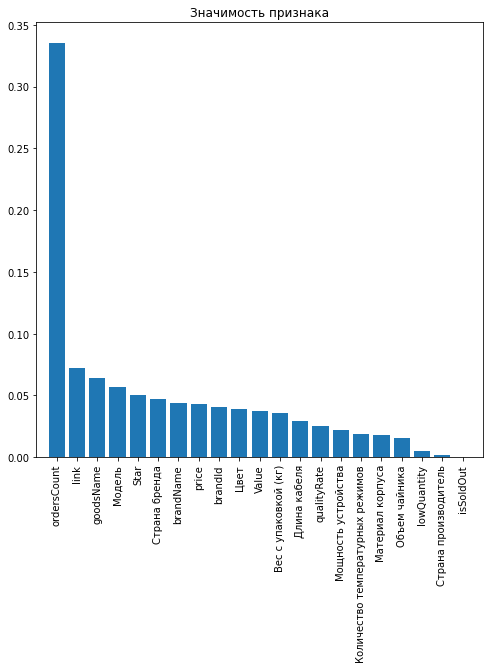

In [26]:
# столбчатая диаграмма
d_first = len(col)
plt.figure(figsize=(8,8))
plt.title('Значимость признака')
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(col)[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first]);

In [27]:
# результат предсказания для тестовой выборки
model.predict(X_test)

array([0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1],
      dtype=int64)

In [28]:
y_test

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1],
      dtype=int64)

In [29]:
r2_score(model.predict(X_test), y_test)

0.4099662975445353

In [31]:
from sklearn import metrics
# метрика, насколько точно мы предсказываем правильные значения как для 0, так и 1
print('Accuracy:', metrics.accuracy_score(y_test, model.predict(X_test)))

Accuracy: 0.8527131782945736


In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model.predict(X_test))

array([[52,  9],
       [10, 58]], dtype=int64)

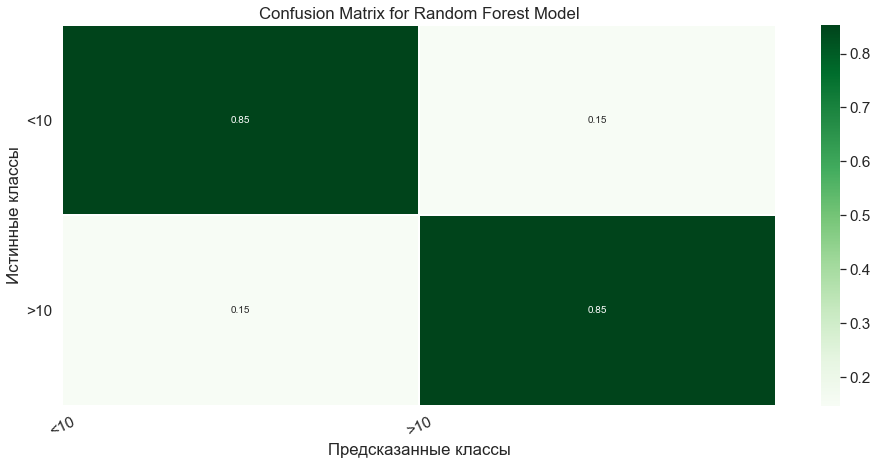

In [36]:
matrix = confusion_matrix(y_test, model.predict(X_test))
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

#Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
           cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names=['<10', '>10']
tick_marks=np.arange(len(class_names))
tick_marks2=tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85        61
           1       0.87      0.85      0.86        68

    accuracy                           0.85       129
   macro avg       0.85      0.85      0.85       129
weighted avg       0.85      0.85      0.85       129

